In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Day 6: Pivots and their Influence on Solution Spaces

We defined *pivots* in our Day 4 notebook -- *pivots* are the leading non-zero entries in each row of a matrix in *row echelon form*. A row in a matrix containing a *pivot* is called a *pivot row* and a column containing a *pivot* is called a *pivot column*.

Further, we identified that the positions of our *pivots* determine the size of our solution space corresponding to a linear system.

+ If the rightmost column of the augmented coefficient matrix is a *pivot column*, then the system is inconsistent (it has no solutions).
+ If all columns other than the rightmost column of the augmented matrix are *pivot columns*, then the system is consistent and has a unique solution.
+ If at least one column other than the rightmost column of the augmented coefficient matrix is *not* a *pivot column*, then the system has infinitely many solutions.

> **Example:** The locations of the *pivots* in the augmented coefficient matrices below tell us about the size of the corresponding solution spaces.
>
>$$\overset{\text{Unique Solution}}{\left[\begin{array}{cc|c}\boxed{~1~} & 0 & -3\\
0 & \boxed{~1~} & 2\end{array}\right]}~~~~\overset{\text{No Solutions}}{\left[\begin{array}{cc|c}\boxed{~1~} & 0 & -3\\
0 & 0 & \boxed{~1~}\end{array}\right]}~~~~\overset{\text{Infinitely Many Solutions}}{\left[\begin{array}{cc|c}\boxed{~1~} & 0 & -3\\
0 & 0 & 0\end{array}\right]}$$

We explore these ideas in greater detail within this notebook.

#### Fundamental Observations About Pivots

There are some basic limitations on the number of *pivots* a matrix or system can have. Recognizing these limitations can reduce the amount of work we need to do if we are only interested in *existence* or particularly *uniqueness* of solutions to systems.

+ In any $m\times n$ matrix, there can be at most one pivot per row. That is, the number of *pivots* is at most $m$.
+ Similarly, in any $m\times n$ matrix, there can be at most one pivot per column. That is, the number of *pivots* is at most $n$.

> **Example:** If an augmented coefficient matrix is $4\times 7$ (so the coefficient matrix is $4\times 6$), then the maximum number of *pivots* in the augmented coefficient matrix is $4$. This means that not every column in the coefficient matrix can be a *pivot column*. For this reason, the corresponding system cannot have a unique solution -- it is either an inconsistent system or it has infinitely many solutions.

#### Pivots, Basic Variables, and Free Variables

As mentioned above and previously, the locations of *pivots* in a *row echelon form* matrix tell us about the number of solutions to the corresponding linear system. Additionally, the *pivots* tell us about the roles of the variables in the corresponding solution set.

In an augmented coefficient matrix, each column to the left of the augmentation line corresponds to a variable in the system.

$$\left[\begin{array}{cccc|c} \overset{\mathbf{x_1}}{a_{11}} & \overset{\mathbf{x_2}}{a_{12}} & \cdots & \overset{\mathbf{x_n}}{a_{1n}} & b_1\\
a_{21} & a_{22} & \cdots & a_{2n} & b_2\\
\vdots & \vdots & \ddots & a_{1n} & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} & b_m\end{array}\right]$$

**Basic and Free Variables:** If a variable corresponds to a *pivot column* in the row echelon form of the augmented coefficient matrix corresponding to a linear system, then that variable is a ***basic variable*** in that system (its value is determined). If a variable does not correspond to a *pivot column*, then that variable is a ***free variable*** it can take on any value.

> **Remark:** Once the values for all *free variables* have been chosen, then the values of the *basic variables* are determined.

### Recap: Pivots, Basic Variables, Free Variables, and Solutions Sets

The following summarizes our discussions so far.

1. Each column to the left of the augmentation line in an augmented coefficient matrix corresponds to a variable in the corresponding system of linear equations.
2. Pivots are the leftmost non-zero entries in each row of a matrix in row echelon form.
3. Rows containing pivots are called pivot rows and columns containing pivots are called pivot columns.
4. If the rightmost column of an augmented coefficient matrix is a pivot column, then the corresponding linear system is inconsistent -- it has no solutions. Otherwise, the system is consistent and either has a unique solution, or infinitely many solutions.
5. Any variable in a system corresponding to a column which is *not* a pivot column in the augmented coefficient matrix is a free variable -- it can take on any value and the system will remain consistent.
6. Any variable in a system corresponding to a pivot column in the augmented coefficient matrix is a basic variable -- its value will be completely determined once values for any free variables have been chosen.
7. If a consistent system has at least one free variable, then it has infinitely many solutions.
8. If a consistent system has no free variables, then it has a unique (exactly one) solution.

>**Example:** For each of the augmented coefficient matrices below, determine the following:
>
> 1. Is the matrix in *reduced row echelon form*, *row echelon form*, or neither?
> 2. Identify the locations of the *pivots*.
> 3. Decide whether the corresponding linear system is *consistent* or *inconsistent*.
> 4. For any consistent linear systems, identify whether the system has any free variables, and identify them if so.
> 5. Identify the size of the solution space for any consistent linear systems you've found.
>
> $$(A)~~\left[\begin{array}{ccc|c} 1 & 0 & 0 & 2\\
0 & 1 & 0 & -1\\
0 & 0 & 1 & 3\end{array}\right]~~~~~(B)~~\left[\begin{array}{ccc|c} 1 & 2 & -1 & 3\\
0 & 1 & 4 & -2\\
0 & 0 & 0 & 0\end{array}\right]$$

$$(C)~~\left[\begin{array}{cc|c} 0 & 1 & 2\\
1 & 0 & 3\end{array}\right]$$

$$(D)~~\left[\begin{array}{ccc|c} 1 & 2 & -1 & 0\\
0 & 1 & 3 & 2\\
1 & 3 & 2 & 7\end{array}\right]~~~~~(E)~~\left[\begin{array}{cccc|c} 1 & 0 & -2 & 4 & 1\\
0 & 1 & 3 & -1 & 0\end{array}\right]$$

### Solutions in Parametric Vector Form and Solution Space Geometry

When we convert a linear system into its augmented coefficient matrix form, we are actually converting that system to an equivalent matrix equation of the form $A\vec{x} = \vec{b}$ and solving that equation instead of the original system. The solution to such a matrix equation is a vector. Because of this, it is often convenient to write solutions to systems of linear equations as vectors.

> **Example:** The linear system $\left\{\begin{array}{rcr} x_1 - 2x_2 + x_3 & = & -5\\
2x_2 + 3x_3 & = & 9\end{array}\right.$ corresponds to the matrix equation $\begin{bmatrix} 1 & -2 & 1\\
0 & 2 & 3\end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ x_3\end{bmatrix} = \begin{bmatrix} -5\\ 9\end{bmatrix}$

When a linear system has a solution with free variables, the solution vector to the corresponding matrix equation $A\vec{x} = \vec{b}$ will not be completely determined -- those free variables show up as *parameters* within the solution vector. We can express the solution vector as a sum of a constant vector and one or more directional vectors scaled by parameters (the free variables). Doing so is called writing the solution in *parametric vector form*.

> **Example:** The augmented coefficient matrix corresponding to the system and matrix equation above is $\left[\begin{array}{ccc|c} 1 & -2 & 1 & -5\\ 0 & 2 & 3 & 9\end{array}\right]$. The *reduced row echelon form* for the matrix is $\left[\begin{array}{ccc|c} 1 & 0 & 4 & 4\\ 0 & 1 & 3/2 & 9/2\end{array}\right]$.
>
> From here, we can see that $x_1$ and $x_2$ are *basic* variables, but $x_3$ is a *free* variable because the third column of the augmented coefficient matrix is *not* a *pivot column*. Both $x_1$ and $x_2$ depend on the free variable $x_3$. We can write the solution vector as $\vec{x} = \begin{bmatrix} 4 - 4x_3\\ \frac{9}{2} - \frac{3}{2}x_3\\ x_3\end{bmatrix}$, however this masks the structure of the solution space. Decomposing the solution vector into a constant vector plus a directional vector with respect to the parameter (free variable) $x_3$ provides additional insight.
>
>\begin{align} \vec{x} &= \begin{bmatrix} x_1\\ x_2\\ x_3\end{bmatrix}\\
&= \begin{bmatrix} 4 - 4x_3\\ \frac{9}{2} - \frac{3}{2}x_3\\ x_3\end{bmatrix}\\
&= \begin{bmatrix} 4\\ \frac{9}{2}\\ 0\end{bmatrix} + \begin{bmatrix}-4x_3\\ -\frac{3}{2}x_3\\ x_3\end{bmatrix}\\
&= \begin{bmatrix} 4\\ \frac{9}{2}\\ 0\end{bmatrix} + x_3\begin{bmatrix}-4\\ -\frac{3}{2}\\ 1\end{bmatrix}
\end{align}
>
> So the solution space here consists of all vectors of the form $\vec{x} = \begin{bmatrix} 4\\ \frac{9}{2}\\ 0\end{bmatrix} + x_3\begin{bmatrix} -4\\ -\frac{3}{2}\\ 1\end{bmatrix}$. This collection forms a line in three-dimensional space, through the point $\begin{bmatrix} 4\\ \frac{9}{2}\\ 0\end{bmatrix}$ and sloped in the direction of the vector $\begin{bmatrix} -4\\ -\frac{3}{2}\\ 1\end{bmatrix}$.

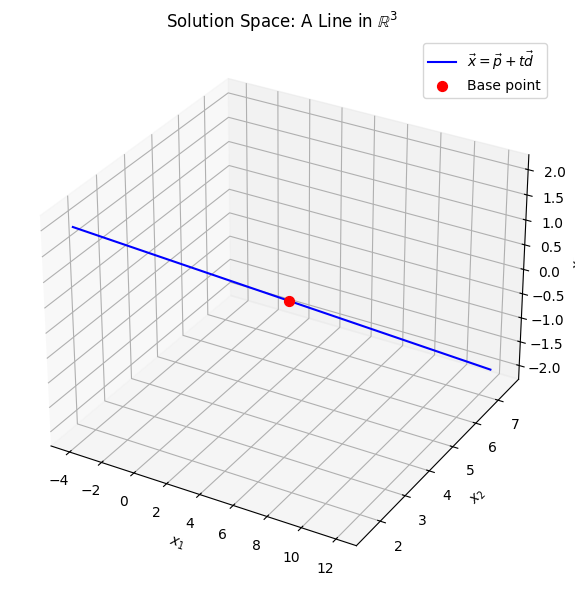

In [4]:
# @title
# Set up the figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the base point and direction vector
base_point = np.array([4, 9/2, 0])
direction = np.array([-4, -3/2, 1])

# Generate parameter values (free variable x3)
t_values = np.linspace(-2, 2, 100)

# Compute points on the line: x = base_point + t * direction
x_vals = base_point[0] + t_values * direction[0]
y_vals = base_point[1] + t_values * direction[1]
z_vals = base_point[2] + t_values * direction[2]

# Plot the line
ax.plot(x_vals, y_vals, z_vals, label=r'$\vec{x} = \vec{p} + t\vec{d}$', color='blue')

# Mark the base point
ax.scatter(*base_point, color='red', s=50, label='Base point')

# Set labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Solution Space: A Line in $\\mathbb{R}^3$')
ax.legend()

plt.tight_layout()
plt.show()


Parametric vector form gives us full insight into the structure of the solution set for the underlying system. The ability to interpret the solution set geometrically, as a line in this case, gives us greater understanding of the solution vectors.


### Free Variables and the Geometry of Solution Spaces

As in the example above, the number of free variables determines the shape of the solution space. Each free variable corresponds to a directional vector that solutions can travel along.

+ The solution space for a system with **no free variables** is *a single point*.
+ The solution space for a system with **exactly one free variable** is *a line*.
+ The solution space for a system with **exactly two free variables** is *a plane*.
+ The solution space for a system with **three or more free variables** is *a hyperplane*.

### Examples

For each of the following systems, write the corresponding matrix equation and the augmented coefficient matrix. Transform the matrix into its equivalent *reduced row echelon form* and identify the pivot columns and highlight any free variables. Write the solution of the system in parametric vector form and describe the geometry of the solution space.

1. $\left\{\begin{array}{rcr} x_1 + 2x_2 - x_3 & = & 4\\
2x_1 + x_2 + x_3 & = & 7\\
-3x_1 + 4x_2 + 2x_3 & = & -1\end{array}\right.$

2. $\left\{\begin{array}{rcr} x_1 - 2x_2 + 3x_3 & = & 1\\
2x_1 + x_2 - x_3 & = & 4\end{array}\right.$

3. $\left\{\begin{array}{rcr} x_1 + x_2 + x_3 & = & 3\\
2x_1 + 3x_2 + 4x_3 & = & 8\\
-3x_1 - 2x_2 - x_3 & = & -5\\
x_1 + 2x_2 + 3x_3 & = & 6\end{array}\right.$

4. $\left\{\begin{array}{rcr} x_1 + x_2 & = & 2\\
2x_1 - x_2 & = & 1\\
3x_1 + x_2 & = & 5\end{array}\right.$

5. $\left\{\begin{array}{rcr} x_1 + 2x_2 - x_3 + x_4 & = & 0\\
2x_1 - x_2 + 3x_3 - x_4 & = & 5\end{array}\right.$

